In [8]:
import pandas as pd
from helpers import *
import matplotlib.pyplot as plt
import math
from collections import Counter

In [9]:
df = pd.read_csv("2002FemPreg.csv")

In [10]:
df.head()
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'poverty_i', 'laborfor_i', 'religion_i', 'metro_i', 'basewgt',
       'adj_mod_basewgt', 'finalwgt', 'secu_p', 'sest', 'cmintvw'],
      dtype='object', length=243)

In [14]:
clean_fem_preg(df)

## Distributions

In [15]:
live = df[df.outcome==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE36A33748>,
      dtype=object)

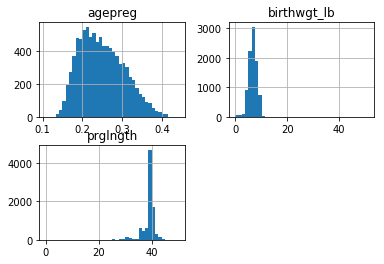

In [16]:
live.hist(column=["birthwgt_lb","agepreg","prglngth"],bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE352582B0>]],
      dtype=object)

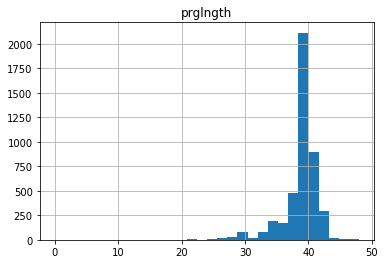

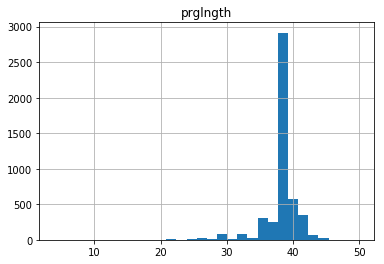

In [17]:
first = live[live.birthord==1]
other = live[live.birthord!=1]

first.hist(column=["prglngth"],bins=30)
other.hist(column=["prglngth"],bins=30)

In [18]:
first['prglngth'].mode()

0    39
dtype: int64

In [19]:
other['prglngth'].mode()

0    39
dtype: int64

In [20]:
first['prglngth'].mean()

38.60095173351461

In [21]:
other['prglngth'].var()

6.842683519298573

## Effect Size

In [22]:
first['prglngth'].mean()-other['prglngth'].mean()

0.07803726677754952

In [23]:
def cohen_effect_size(series1, series2):
    diff = series1.mean()-series2.mean()
    
    var1, var2 = series1.var(), series2.var()
    n1,n2 = len(series1), len(series2)
    pooled_var = (n1*var1+n2*var2)/(n1+n2)
    effect_size = diff/math.sqrt(pooled_var)
    return effect_size

In [15]:
d = cohen_effect_size(first['prglngth'],other['prglngth'])
d

0.028879044654449883

## PMFs

In [24]:
def pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

In [25]:
mf = pmf([1, 2, 2, 3, 5])
mf

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [26]:
a={1:4,2:5,3:6}
print(list(a.values()))

[4, 5, 6]


In [27]:
dfa = pd.DataFrame.from_dict(a,orient='index',columns=['values'])
dfa

,values
1,4
2,5
3,6


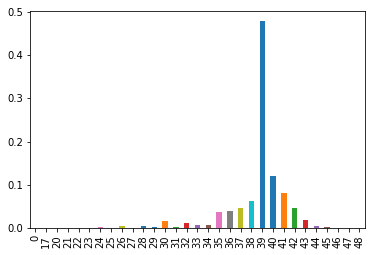

In [28]:
pmf_first = pd.Series(pmf(first['prglngth']))
pmf_first.sort_index().plot(kind='bar')

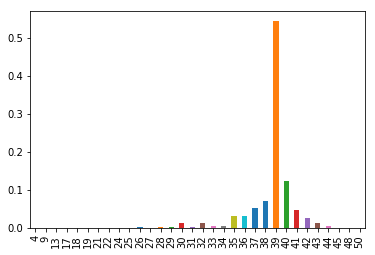

In [29]:
pmf_other = pd.Series(pmf(other['prglngth']))
pmf_other.sort_index().plot(kind='bar')

### Comparing PMFs

<BarContainer object of 11 artists>

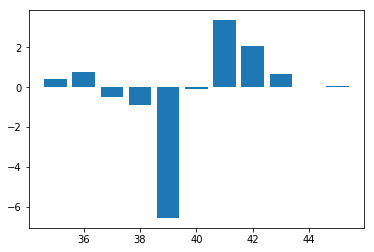

In [30]:
weeks = list(range(35,46))
diffs = []
for week in weeks:
    p1 = pmf_first[week]
    p2 = pmf_other[week]
    diff = 100*(p1-p2)
    diffs.append(diff)
    
plt.bar(weeks,diffs)

### Calculate the mean given pmf
What is the mean of a distribution given the pmf

see: https://socratic.org/questions/how-do-you-use-a-probability-mass-function-to-calculate-the-mean-and-variance-of

In [31]:
def mean_pmf(series):
    products = []
    for x,value in series.iteritems():
        products.append(x*value)
    return sum(products)

In [32]:
mean_pmf(pmf_other),mean_pmf(pmf_first)

(38.522914466737056, 38.60095173351461)

### Calculate variance given pmf

In [33]:
def var_pmf(series):
    expectation_x    = []
    expectation_mean = []
    for x,value in series.iteritems():
        expectation_mean.append(x*value)
        expectation_x.append(x**2*value)
    return sum(expectation_x)-(sum(expectation_mean)**2)

In [34]:
var_pmf(pmf_other),var_pmf(pmf_first)

(6.841238390784156, 7.792947202066216)

## Percentiles

In [35]:
def percentile_rank(scores, score_i):
    count = 0
    for score in scores:
        if score<=score_i:
            count +=1
            
    percentile_rank = 100*count/len(scores)
    return percentile_rank

In [36]:
def percentile(scores,percentile_rank):
    scores.sort()
    for score in scores:
        if percentile_rank(scores,score)>=percentile_rank:
            return score
        
def percentile_2(scores,percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

## CDFs

In [37]:
def eval_cdf(sample,x):
    count = 0.
    for value in sample:
        if value <= x:
            count += 1
    prob = count/len(sample)
    return prob

def inverse_cdf(samples,prob):
    samples.sort()
    index = prob * (len(samples)-1)
    return samples[index]

In [38]:
a = [1,2,3,4,5,6]
print(eval_cdf(a,6))
print(a)
print(inverse_cdf(a,1))

1.0
[1, 2, 3, 4, 5, 6]
6


### Pandas Complaint Version

In [39]:
def eval_cdf_s(series,x):
    count = 0
    for value in series.values:
        if value <= x:
            count += 1
    prob = count/len(sample)
    return prob

def inverse_cdf(series,prob):
    sorted_s = series.sort_values(ascending=True)
    index = prob * (len(sorted_s)-1)
    return sorted_s[index]

### Comparing CDFs

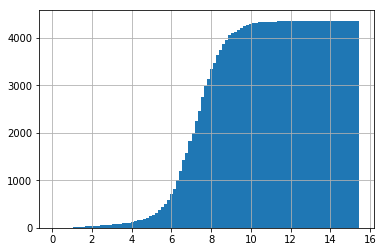

In [40]:
first['totalwgt_lb'].hist(cumulative=True, density=0, bins=100)

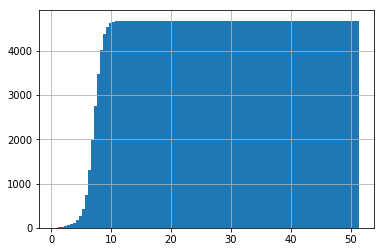

In [41]:
other['totalwgt_lb'].hist(cumulative=True, density=0, bins=100)

In [42]:
def pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

In [45]:
## Totally wrong..please update
def cdf(series):
    sorted_s =  series.sort_values(ascending=True)
    pmf_dict = pmf(sorted_s)
    cumsum = 0
    sums = []
    for x,value in pmf_dict.items():
        cumsum += value
        sums.append(cumsum)
    return sums

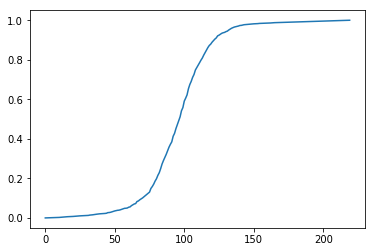

In [47]:
cdf_sums = cdf(first['totalwgt_lb'])
plt.plot(cdf_sums)

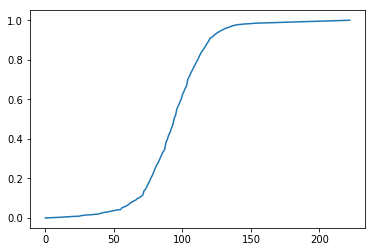

In [48]:
cdf_sums = cdf(other['totalwgt_lb'])
plt.plot(cdf_sums)